In [298]:
import sklearn as sk
import pandas as pd
import numpy as np
from sklearn import datasets

In [164]:
iris = datasets.load_iris()

In [165]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [166]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [167]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [168]:
iris_df['target'] = iris.target

In [169]:
iris_df.iloc[:,-1] 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [170]:
iris_df = iris_df.drop(iris_df[iris_df.target == 2].index)

In [171]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,-1]
X
Y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [172]:
import matplotlib.pyplot as plt

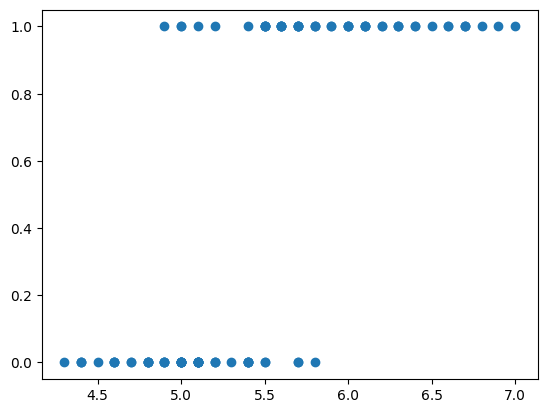

In [173]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:,0], Y)
plt.show()

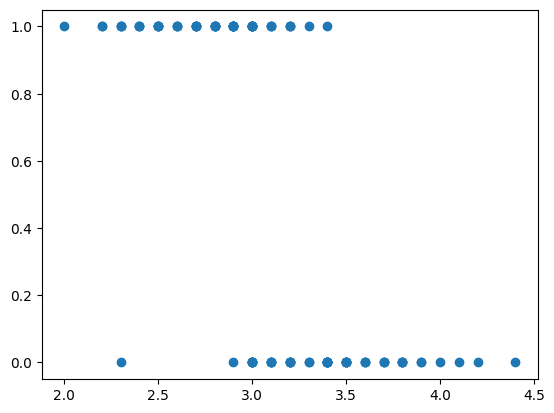

In [174]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:,1], Y)
plt.show()

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train, X_test = X_train.to_numpy(), X_test.to_numpy()
Y_train, Y_test = Y_train.to_numpy(), Y_test.to_numpy()

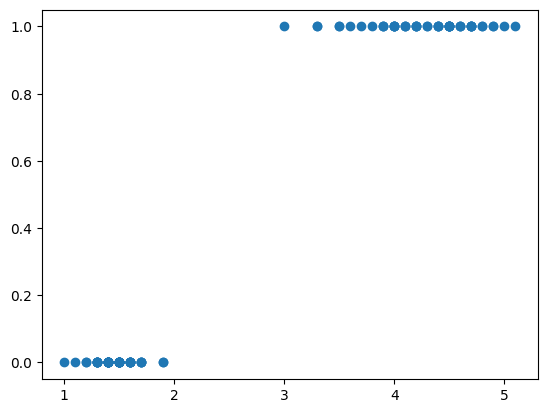

In [176]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:,2], Y)
plt.show()

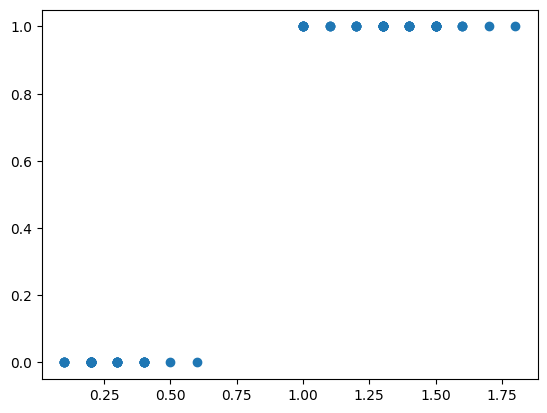

In [177]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:,3], Y)
plt.show()

In [282]:
class LogisticRegression:

    def __init__(self, w, b):
        self.w = w
        self.b = b

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def forward(self, X):
        mu = X.mean(axis=0)
        sigma = X.std(axis=0)
        X_normalized = (X - mu) / sigma
        z = np.dot(X_normalized, self.w)+self.b
        a = self.sigmoid(z)
        return a
        
    def cost_function(self, X, y):
        eps = 1e-9
        f = self.forward(X)
        m = X.shape[0]
        g = np.sum((y * np.log(f+eps)) + ((1-y) * np.log(1-f+eps)))
        cost = (-1/m) * g
        return cost
    
    def diff_w(self, X, y):
        y_pred = self.forward(X)
        m = X.shape[0]
        f = -1 * np.sum((y - y_pred).reshape(-1, 1) * X)
        diff = (1/m) * f
        return diff
    
    def diff_b(self, X, y):
        y_pred = self.forward(X)
        m = X.shape[0]
        f = -1 * np.sum(y - y_pred)
        diff = (1/m) * f
        return diff
    
    def fit(self, X, y, lr, iterations):
        for i in range(iterations):
            dx = self.diff_w(X, y)
            db = self.diff_b(X, y) 
            self.w = self.w - (lr * dx)
            self.b = self.b - (lr * db)
            if i % 10 == 0:
                print(f"epoch {i}: {self.cost_function(X, y)}")
        return (self.w,self.b)

    def predict(self,X):
        pred = self.forward(X)
        return np.array(pred >= 0.6, dtype=int)

    def confusion_matrix(self, Y_test, Y_predict):
        unique_labels = np.array([0, 1])  # Assuming binary classification
        length = len(unique_labels)
        matrix = np.zeros((length, length))
        for true_label, pred_label in zip(Y_test, Y_predict):
            true_idx = np.where(unique_labels == true_label)[0][0]
            pred_idx = np.where(unique_labels == pred_label)[0][0]
            matrix[true_idx, pred_idx] += 1
        return matrix


In [283]:
# w = np.random.rand(X_train.shape[1])
w = np.random.rand(X_train.shape[1])
b = np.random.rand(1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(w)
print(b)

(80, 4)
(80,)
(20, 4)
(20,)
[0.37666141 0.24864754 0.02519034 0.56262912]
[0.84986461]


In [292]:
log_reg = LogisticRegression(w, b)
lr = 0.01
iterations = 1000
pred_w,pred_b = log_reg.fit(X_train, Y_train, lr, iterations)

epoch 0: 0.5037607170638579
epoch 10: 0.5795976914264843
epoch 20: 0.6699262021409331
epoch 30: 0.7665530050340283
epoch 40: 0.8587034737094513
epoch 50: 0.9383699583939074
epoch 60: 1.0023536277399119
epoch 70: 1.0509520152751437
epoch 80: 1.0860621757609514
epoch 90: 1.1099837670385486
epoch 100: 1.1248821541473526
epoch 110: 1.1326106473971276
epoch 120: 1.134688473108442
epoch 130: 1.1323352248643221
epoch 140: 1.126519807217155
epoch 150: 1.1180079522496127
epoch 160: 1.1074032600300368
epoch 170: 1.0951809465320193
epoch 180: 1.081714965974496
epoch 190: 1.0672995680014699
epoch 200: 1.0521663394496639
epoch 210: 1.0364976412343831
epoch 220: 1.0204371889685473
epoch 230: 1.0040983782102455
epoch 240: 0.9875708314790457
epoch 250: 0.9709255441907892
epoch 260: 0.9542189271323711
epoch 270: 0.9374959802374359
epoch 280: 0.9207927828271245
epoch 290: 0.9041384463453582
epoch 300: 0.88755664471839
epoch 310: 0.8710668130557624
epoch 320: 0.854685086116369
epoch 330: 0.83842503271628

In [293]:
testing = LogisticRegression(w,b)

In [294]:
pred_w

array([1.23442551, 1.10641164, 0.88295445, 1.42039322])

In [295]:
pred_b

array([0.24977976])

In [296]:
Y_predict = log_reg.predict(X_test)

In [297]:
log_reg.confusion_matrix(Y_predict,Y_test)

array([[11.,  1.],
       [ 1.,  7.]])